In [1]:
import sys
sys.path.append('../')

In [25]:
from ddpg_torch import OUActionNoise
from config import *
from finrl.meta.preprocessor.preprocessors import data_split

import numpy as np
import pandas as pd
import random

In [3]:
import matplotlib.pyplot as plt

In [4]:
print('SEED: ', SEED)
np.random.seed(SEED)
random.seed(SEED)

SEED:  9927


In [5]:
print(sigma)
print(theta)
print(dt)

0.15
0.2
0.01


In [29]:
processed_csv = '../data/sensex/sensex_tics_processed.csv'
print(f'Reading processed csv {processed_csv}')
df_processed = pd.read_csv(processed_csv, index_col='Unnamed: 0')

train = data_split(df_processed, TRAIN_START_DATE, TRAIN_END_DATE)

print('Train from', train['date'].iloc[0], ' to ', train['date'].iloc[-1])
print('train unique dates: ', train.date.nunique())

TOTAL_STEPS_GLOBAL = TOTAL_EPISODES*train.date.nunique()
# env
n_actions = stock_dimension = len(train.tic.unique())
print('n actions: ', n_actions)
print('total eps: ', TOTAL_EPISODES)
print('Total steps global', TOTAL_STEPS_GLOBAL)

Reading processed csv ../data/sensex/sensex_tics_processed.csv
Train from 2009-01-01  to  2015-12-31
train unique dates:  1735
n actions:  27
total eps:  60
Total steps global 104100


In [7]:
noise = OUActionNoise(mu=np.zeros(n_actions), sigma=sigma, theta=theta, dt=dt)

In [8]:
# call noise using # noise

In [33]:
overall_noise_list = []
noise_for_single_stk = []
noise_for_single_stk_annealed = []

for step in range(TOTAL_STEPS_GLOBAL):
    a = noise()
    overall_noise_list.append(a)
    noise_for_single_stk.append(a[0])
    n = a[0]*((TOTAL_STEPS_GLOBAL-step)/TOTAL_STEPS_GLOBAL)
    noise_for_single_stk_annealed.append(n)

In [34]:
len(noise_for_single_stk)

104100

/tmp/ipykernel_14007/3288277258.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


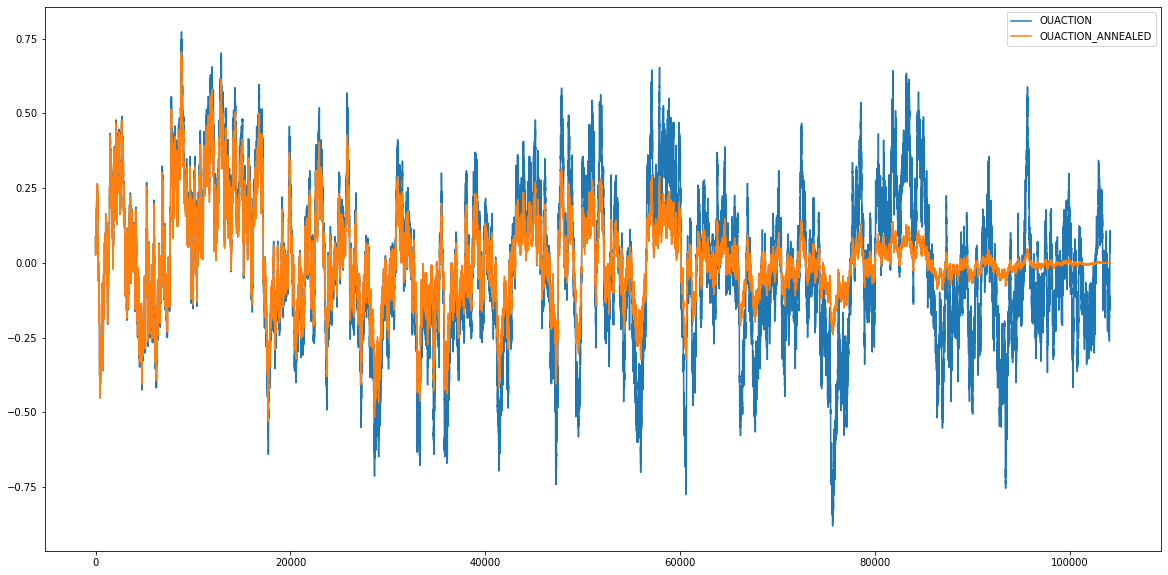

In [37]:
# plot
plt.figure(figsize=(20,10))
plt.plot(noise_for_single_stk, label = "OUACTION")
plt.plot(noise_for_single_stk_annealed, label = "OUACTION_ANNEALED")
plt.legend()
plt.show()

In [38]:
noise_factor = []
for step in range(TOTAL_STEPS_GLOBAL):
    noise_factor.append((TOTAL_STEPS_GLOBAL-step)/TOTAL_STEPS_GLOBAL)

Text(0, 0.5, 'Noise multiplier')

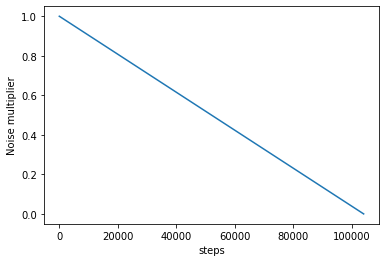

In [40]:
plt.plot(noise_factor)
plt.xlabel('steps')
plt.ylabel('Noise multiplier')

### UNIFORM sampling for start_steps

In [43]:
np.random.uniform(low=-1, high=1, size=n_actions)

array([-0.59783825,  0.92338496, -0.31278331,  0.06913592,  0.18571901,
        0.59150962,  0.93940862, -0.20102537,  0.72382039,  0.99021201,
        0.36224791, -0.38224273,  0.98373955,  0.74665772, -0.60111719,
       -0.05829463, -0.57171212,  0.14939168,  0.13675307,  0.87953606,
       -0.80045061, -0.52846339, -0.63724945,  0.58709969,  0.71895038,
       -0.5367991 , -0.94613852])